# 6 УРОК ЗАДАНИЕ

ETL (PYTHON + SQL)

# 1

###### Применим знания на практике: с помощью pandahouse попробуем выгрузить нужные данные из ClickHouse и проанализируем их в python. 

На этот раз новый датасет, содержащий информацию об объявлениях на Airbnb в Лондоне 🇬🇧.

ldn_listings – информация о жилье, включая полные описания, характеристики и средние оценки в отзывах; 

поскольку столбцов очень много, нужные перечислены в текстах самих задач

In [1]:
import pandahouse as ph
import pandas as pd

In [2]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

## 2

##### Для начала, проверим правильность подключения к ClickHouse через pandahouse, отправив простой запрос: 

выведите количество строк в таблице ldn_listings.

In [12]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
    SELECT COUNT(*)
    FROM 
        {db}.ldn_listings 
  
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test = ph.read_clickhouse(query=q, connection=connection_default)
q_test

,count()
0,85207


##### ОТВЕТ: 85207

## 3

In [ ]:
Выгрузите из таблицы данные о цене в зависимости от типа жилья. Необходимые столбцы:

price – цена за ночь
room_type – тип сдаваемого жилья (доступные варианты: Entire home/apt, Private room, Hotel room, Shared room)
Ограничение поставьте на 1000 строк. Результат должен быть отсортирован по возрастанию id.

Пример результирующей таблицы:

+-----------------+------------+
| room_type       | price      |
+-----------------+------------+
| Private room    |         65 | 
| Entire home/apt |        100 | 
+-----------------+------------+
Hint: replaceRegexpAll(столбец, что_заменить, на_что_заменить) – паттерн [$,] чтобы избавиться от $ и запятых; toFloat32OrNull(столбец)

Сгруппируйте полученный датафрейм по типу жилья и посчитайте 75-й перцентиль цены.

В качестве ответа впишите полученное значение 75 перцентиля цены для комнат типа Private room.

In [3]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
SELECT
    room_type,
        toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) AS price
    FROM 
        {db}.ldn_listings 
    ORDER BY id
    LIMIT 1000
  
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test2 = ph.read_clickhouse(query=q, connection=connection_default)
q_test2

,room_type,price
0,Private room,65.0
1,Entire home/apt,100.0
2,Entire home/apt,300.0
3,Private room,150.0
4,Entire home/apt,65.0
...,...,...
995,Entire home/apt,110.0
996,Entire home/apt,110.0
997,Private room,65.0
998,Entire home/apt,100.0


In [4]:
q_test2.groupby('room_type').describe()

price                                                      \
                 count        mean         std   min    25%    50%     75%   
room_type                                                                    
Entire home/apt  443.0  153.182846  149.768158  23.0   90.0  120.0  160.00   
Hotel room         2.0  134.000000   65.053825  88.0  111.0  134.0  157.00   
Private room     551.0   66.820328   78.609314  12.0   35.5   49.0   70.00   
Shared room        4.0   61.250000   70.244217  20.0   21.5   29.5   69.25   

                         
                    max  
room_type                
Entire home/apt  2000.0  
Hotel room        180.0  
Private room     1000.0  
Shared room       166.0

In [5]:
q_test2.query("room_type == 'Private room'").price.quantile(q=0.75)

70.0

In [6]:
# Альтернативный подход
df = q_test2.groupby(['room_type'])['price'].quantile(q=0.75).reset_index()
df[df['room_type'] == 'Private room']



,room_type,price
2,Private room,70.0


### ОТВЕТ 70

# 4

In [ ]:
К данным о цене и типе комнаты дополнительно выгрузите данные о рейтинге жилья (review_scores_rating).

В запросе необходимо будет отфильтровать пустые значения review_scores_rating и сконвертировать эту колонку в тип float32.

Hint: toFloat32OrNull(столбец)

Давайте построим график рассеивания, который покажет зависимость средней оценки от средней цены по типу жилья.

Исходная таблица должна выглядеть так:

+-----------------+------------+--------------------+
| room_type       | price      |review_scores_rating|
+-----------------+------------+--------------------+
| Private room    |         65 | 96.0               |
| Entire home/apt |        100 | 78.0               |
+-----------------+------------+--------------------+
1) сгруппируйте датафрейм по типу жилья и посчитайте среднее для цены и рейтинга (не забудьте привести рейтинг к типу float)

2) используйте sns.scatterplot, чтобы построить график рассеивания средней цены (ось X) и рейтинга (ось Y) 

c разбивкой по типу жилья (параметр hue)

Hint: документация sns.scatterplot

In [7]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
SELECT
    room_type,
        toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) AS price,
        toFloat32OrNull(review_scores_rating) AS review_scores_rating
    FROM 
        {db}.ldn_listings 
        
    WHERE review_scores_rating is not null 
    ORDER BY id
    LIMIT 1000
  
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
q_test2 = ph.read_clickhouse(query=q, connection=connection_default)
q_test2

,room_type,price,review_scores_rating
0,Private room,65.0,97.0
1,Entire home/apt,100.0,96.0
2,Entire home/apt,300.0,94.0
3,Entire home/apt,65.0,93.0
4,Private room,29.0,96.0
...,...,...,...
995,Entire home/apt,165.0,100.0
996,Private room,99.0,93.0
997,Private room,45.0,100.0
998,Private room,20.0,88.0


In [23]:
avg_review_scores_rating = q_test2.groupby('room_type', as_index = False).agg({'review_scores_rating':'mean'})
avg_review_scores_rating

,room_type,review_scores_rating
0,Entire home/apt,93.568787
1,Hotel room,92.500000
2,Private room,94.766205
3,Shared room,90.000000


In [20]:
avg_price = q_test2.groupby(['room_type'], as_index = False).agg({'price':'mean'})
avg_price

,room_type,price
0,Entire home/apt,135.882950
1,Hotel room,134.000000
2,Private room,54.642437
3,Shared room,21.000000


In [26]:
avg_price_rating = q_test2.groupby(['room_type'], as_index = False).agg({'price':'mean','review_scores_rating':'mean'})
avg_price_rating

,room_type,price,review_scores_rating
0,Entire home/apt,135.882950,93.568787
1,Hotel room,134.000000,92.500000
2,Private room,54.642437,94.766205
3,Shared room,21.000000,90.000000


In [8]:
import seaborn as sns

In [9]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

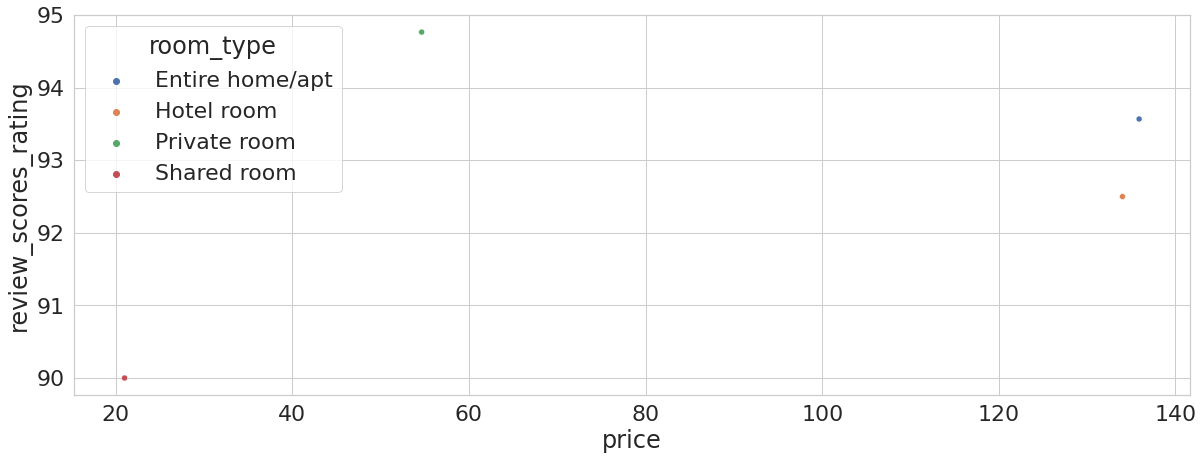

In [32]:
sns.scatterplot(data=avg_price_rating, x='price', y='review_scores_rating', hue='room_type')

## 5

#### Итак, помимо аренды жилья, на Airbnb также есть "Впечатления" — мероприятия, которые организуют местные жители.

Проверим, какие способы верификации аккаунта использовали хозяева, предлагающие различные впечатления 

(experiences_offered != 'none'). Для каждого уникального пользователя выгрузите только две колонки:

host_id – идентификатор хозяина (уникальный)

host_verifications – какими способами хост подтвердил свой профиль

Затем обработайте столбец host_verifications:

В ячейках находятся строковые представления списка (например, как результат str([1, 2, 3])). 

Приведите их к настоящему списку, где в качестве элементов будут храниться использованные способы подтверждения аккаунта: 

"['email', 'phone', 'facebook']" -> ['email', 'phone', 'facebook']


2. Используйте методы explode и value_counts, чтобы посчитать, сколько раз встречается каждый способ верификации

Сколько хозяев подтвердили профиль с помощью аккаунта Google?

In [ ]:
# 6 урок > 5 шаг > SQL

- **Как решить это задание?**
    
    В этом задании вам нужно:
    
    1. Выгрузить таблицу с данными о уникальном `host_id` и `host_verifications` , с `experiences_offered` не равном  `'none'`.
    2. Обработать столбец `host_verifications` с помощью лямбда-функции, привести к  списку, где в качестве элементов будут храниться использованные способы подтверждения аккаунта
    3. В лямбда-функции используйте: `strip()` чтобы удалить символы с начала и конца строки, `replace()` чтобы заменить подстроку на другую подстроку, `split()` чтобы разделить строку в массив по переданному разделителю
    
    Документация strip(), replace() и split()
    
- **Лямбда-функция**
    
    Лямбда-функции - это такая компактная и анонимная функция в одну строчку, отмеченные ключевым словом `lambda`. Структура функции такая:
    
    ![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/30b762b8-50cf-49a6-9cb3-3e49e4a6c5ab/lambda.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/30b762b8-50cf-49a6-9cb3-3e49e4a6c5ab/lambda.png)
    
    `lambda` - ключевое слово
    
    `bound variable` - аргументы лямбда-функции(через запятую)
    
    `body` - выражение, тело функции, в котором мы и пишем код функции.
    
    Вдобавок к этому синтаксис лямбда-функций может быть полезен, если нам нужно адаптировать какую-то более сложную функцию для использования в функции, например `map()` или `apply()`
    
    ```python
    df.apply(lambda x: func(x))
    ```
    
    `x` - это датафрейм, на который мы применяем функцию.
    
- **Как посчитать все значения?**
    
    Используйте методы `explode` и `value_counts`:
    
    - `explode()`- переводит из одной строки со списком в несколько строк с единственным значением
    - `value_counts()` - считает количество значений

In [53]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
SELECT
    DISTINCT host_id,
        host_verifications
        
    FROM 
        {db}.ldn_listings 
        
    WHERE experiences_offered != 'none' 
 
   
  
    '''

# отправляем запрос и записываем результат в пандасовский датафрейм
df3= ph.read_clickhouse(query=q, connection=connection_default)
df3_1= ph.read_clickhouse(query=q, connection=connection_default)
df3

,host_id,host_verifications
0,54730,"['email', 'phone', 'facebook', 'reviews', 'off..."
1,60302,"['email', 'phone', 'reviews', 'jumio', 'govern..."
2,67915,"['email', 'phone', 'jumio', 'selfie', 'governm..."
3,167107,"['email', 'phone', 'manual_offline', 'jumio', ..."
4,103583,"['email', 'phone', 'reviews', 'offline_governm..."
...,...,...
1356,21558962,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1357,21257846,"['email', 'phone', 'reviews', 'jumio', 'offlin..."
1358,34219613,"['email', 'phone', 'reviews', 'jumio', 'govern..."
1359,34299581,"['email', 'phone', 'google', 'reviews', 'jumio..."


In [82]:
df3.host_verifications = df3.host_verifications.apply(lambda x: x.strip('[]').replace("'",'').split(', '))
df3

,host_id,host_verifications
0,54730,"[email, phone, facebook, reviews, offline_gove..."
1,60302,"[email, phone, reviews, jumio, government_id]"
2,67915,"[email, phone, jumio, selfie, government_id, i..."
3,167107,"[email, phone, manual_offline, jumio, offline_..."
4,103583,"[email, phone, reviews, offline_government_id,..."
...,...,...
1356,21558962,"[email, phone, reviews, jumio, government_id]"
1357,21257846,"[email, phone, reviews, jumio, offline_governm..."
1358,34219613,"[email, phone, reviews, jumio, government_id]"
1359,34299581,"[email, phone, google, reviews, jumio, offline..."


###### eval(x) подглядел

In [54]:
# Приводим данные в колонке в нужный тип
df3_1.host_verifications = df3_1.host_verifications.apply(lambda x: eval(x))
df3_1

,host_id,host_verifications
0,54730,"[email, phone, facebook, reviews, offline_gove..."
1,60302,"[email, phone, reviews, jumio, government_id]"
2,67915,"[email, phone, jumio, selfie, government_id, i..."
3,167107,"[email, phone, manual_offline, jumio, offline_..."
4,103583,"[email, phone, reviews, offline_government_id,..."
...,...,...
1356,21558962,"[email, phone, reviews, jumio, government_id]"
1357,21257846,"[email, phone, reviews, jumio, offline_governm..."
1358,34219613,"[email, phone, reviews, jumio, government_id]"
1359,34299581,"[email, phone, google, reviews, jumio, offline..."


In [55]:

df3_1.host_verifications.explode()

0                       email
0                       phone
0                    facebook
0                     reviews
0       offline_government_id
                ...          
1360                    phone
1360                  reviews
1360           manual_offline
1360                    jumio
1360            government_id
Name: host_verifications, Length: 7976, dtype: object

In [56]:
df3_1.host_verifications.explode().value_counts()

phone                    1361
email                    1345
reviews                  1309
government_id            1196
jumio                    1115
offline_government_id     469
work_email                279
facebook                  270
selfie                    252
identity_manual           227
manual_offline             70
google                     34
kba                        27
manual_online              16
sent_id                     6
Name: host_verifications, dtype: int64

In [57]:
df3_1.explode('host_verifications')

,host_id,host_verifications
0,54730,email
0,54730,phone
0,54730,facebook
0,54730,reviews
0,54730,offline_government_id
...,...,...
1360,26917573,phone
1360,26917573,reviews
1360,26917573,manual_offline
1360,26917573,jumio


In [58]:
df3_1.explode('host_verifications').host_verifications.value_counts()

phone                    1361
email                    1345
reviews                  1309
government_id            1196
jumio                    1115
offline_government_id     469
work_email                279
facebook                  270
selfie                    252
identity_manual           227
manual_offline             70
google                     34
kba                        27
manual_online              16
sent_id                     6
Name: host_verifications, dtype: int64

In [61]:
df3_1.explode('host_verifications').value_counts('host_verifications')

host_verifications
phone                    1361
email                    1345
reviews                  1309
government_id            1196
jumio                    1115
offline_government_id     469
work_email                279
facebook                  270
selfie                    252
identity_manual           227
manual_offline             70
google                     34
kba                        27
manual_online              16
sent_id                     6
dtype: int64

##### ОТВЕТ 34

# 6

In [ ]:
Теперь посмотрим, для скольких объявлений и в каких районах хозяева указали впечатления. 

Сгруппируйте данные по району и виду впечатления и посчитайте количество объявлений. Новый столбец назовите experiences_count.

Пример трёх строк результирующей таблицы: в районе City of London для 7 объявлений указан тип впечатления business, 
    для одного – family.

+------------------------+---------------------+-------------------+
| neighbourhood_cleansed | experiences_offered | experiences_count |
+------------------------+---------------------+-------------------+
| City of London         | business            |                 7 |
| City of London         | family              |                 1 |
| City of London         | romantic            |                 1 |
+------------------------+---------------------+-------------------+
Отсортируйте данные по убыванию experiences_count и выгрузите первые 100 строк. Затем преобразуйте данные с помощью pivot, 
поместив в индексы название района, столбцы – вид впечатления, а значения – число объявлений с таким впечатлением 
для каждого района. Визуализируйте результат с помощью sns.heatmap() c палитрой cmap=sns.cubehelix_palette(as_cmap=True). 

Какой график получился?

In [ ]:
- **Как решить это задание?**
    
    В этом задании нужно выгрузить первые **100 строк** таблицы с данными о количестве объявлений, 
    где `experiences_offered != 'none’`, сгруппировав по району и виду впечатления. Затем, используя `.pivot()`, 
    поместить в индексы **название района**, в столбцы – **вид впечатления**, а в значения – **число объявлений.** 
    Визуализируйте с помощью `sns.heatmap()` с палитрой `cmap=sns.cubehelix_palette(as_cmap=True)`
    
- **Почему мой ответ не принимают?**
    
    Убедитесь, что вы:
    
    1. Посчитали **количество** объявлений и назвали новый столбец `experiences_count`.
    2. Сгруппировали по `neighbourhood_cleansed`, `experiences_offered`.
    3. Отсортировали значения, где `experiences_offered != 'none’`.
    4. Отсортировали данные по убыванию `experiences_count`
    5. Установили **лимит** в **100 строк.**
    6. С помощью `.pivot()` преобразовали данные, поместив в индексы `neighbourhood_cleansed`, столбцы – `experiences_offered`,
    а значения – `experiences_count`.
    7. Визуализировали данные результат с помощью `sns.heatmap()` c палитрой `cmap=sns.cubehelix_palette(as_cmap=True)`

In [10]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
SELECT
    neighbourhood_cleansed,
        experiences_offered,
        count(*) AS experiences_count
        
    FROM 
        {db}.ldn_listings 
    WHERE experiences_offered != 'none'
           
    GROUP BY neighbourhood_cleansed, experiences_offered
    ORDER BY experiences_count DESC
    LIMIT 100
    
    '''
# WHERE experiences_offered != 'none' Это обязательно надо --LIMIT 100
# отправляем запрос и записываем результат в пандасовский датафрейм
df4= ph.read_clickhouse(query=q, connection=connection_default)
df4

,neighbourhood_cleansed,experiences_offered,experiences_count
0,Hackney,family,61
1,Tower Hamlets,business,58
2,Westminster,business,50
3,Hackney,social,49
4,Hammersmith and Fulham,business,48
...,...,...,...
95,Redbridge,social,2
96,Barking and Dagenham,social,2
97,Newham,romantic,1
98,Bexley,business,1


In [11]:
# Готовим данные к визуализации
data4  = df4.pivot(index='neighbourhood_cleansed',
                 columns='experiences_offered',
                 values='experiences_count'
                )
data4

experiences_offered,business,family,romantic,social
neighbourhood_cleansed,,,,
Barking and Dagenham,NaN,NaN,NaN,2.0
Barnet,7.0,7.0,3.0,5.0
Bexley,1.0,NaN,NaN,NaN
Brent,9.0,21.0,5.0,6.0
Bromley,3.0,2.0,NaN,4.0
Camden,36.0,30.0,19.0,25.0
City of London,7.0,1.0,NaN,NaN
Croydon,2.0,3.0,NaN,4.0
Ealing,6.0,13.0,NaN,5.0


In [12]:
cmap=sns.cubehelix_palette(as_cmap=True)

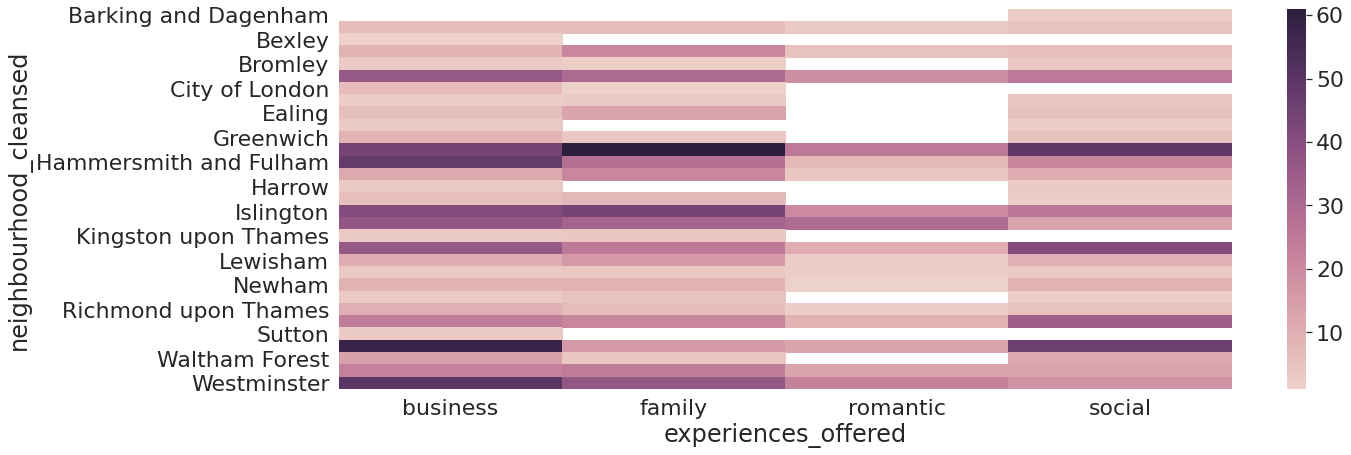

In [13]:
sns.heatmap(data4, cmap=sns.cubehelix_palette(as_cmap=True))

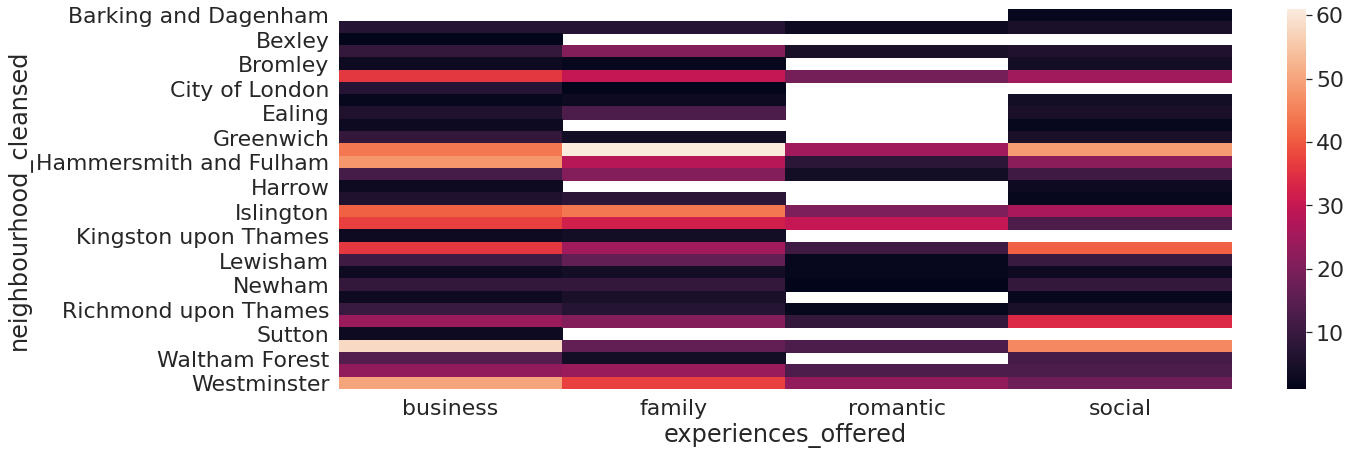

In [14]:
sns.heatmap(data4)
cmap=sns.cubehelix_palette(as_cmap=True)

## 7

In [ ]:
Выгрузите данные о ценах за ночь для разных типов жилья, для которых также доступен какой-либо вид впечатления. 
Необходимые для составления запроса столбцы:

room_type – тип сдаваемого жилья (доступные варианты: Entire home/apt, Private room, Hotel room, Shared room)
price – цена за ночь 
experiences_offered – вид доступного впечатления (оставить не 'none')
Пример части результирующей таблицы:

+-----------------+------------+
| room_type       | price_corr |
+-----------------+------------+
| Private room    |         65 |
| Entire home/apt |        100 |
| Entire home/apt |        ... |
+-----------------+------------+
Hint: replaceRegexpAll(столбец, что_заменить, на_что_заменить) – паттерн [$,] чтобы избавиться от $ и запятых; 
    
    toFloat32OrNull(столбец)

Далее постройте два графика, используя distplot из библиотеки seaborn:

На первом отобразите исходные распределения цен для каждого типа жилья
На втором – логарифмированные значения (np.log())

In [ ]:
- **Как решить это задание?**
    1. Выгрузить таблицу с данными о типе жилья и о цене, где `experiences_offered != 'none’`. Используйте `replaceRegexpAll(столбец, что_заменить, на_что_заменить)` чтобы избавиться от $ и запятых и `toFloat32OrNull` чтобы привести колонку к нужному типу.
    2. Постройте два графика, используя `distplot` из библиотеки `seaborn`:
    - На первом отобразите исходные распределения цен для каждого типа жилья
    - На втором – логарифмированные значения (`np.log()`)
- **distplot()**
    
    В этом задании нужно построить два графика, используя `distplot`. В одном графике можно отобразить сразу несколько типов жилья:
    
    ```python
    sns.distplot(df.query("type=='type_1'").column, kde=False, label='type_1')
    sns.distplot(df.query("type=='type_2'").column, kde=False, label='type_2')
    plt.legend()
    plt.show()
    ```
    
    Так же если надо получить логарифмированные значения:
    
    ```python
    sns.distplot(np.log(df.query("type=='type_1'").column), kde=False, label='type_1')
    sns.distplot(np.log(df.query("type=='type_2'").column), kde=False, label='type_2')
    plt.legend()
    plt.show()
    ```
    
    Документация [distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html)
    
- **Я всё сделал(а) как надо, почему мой ответ не принимают?**
    
    Не забудьте, что необходимо указать **2** графика.

In [28]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
SELECT
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$,]','')) AS price_corr
    
        
    FROM 
        {db}.ldn_listings 
        
    WHERE experiences_offered != 'none'
           
    
    
    
    '''

# WHERE experiences_offered != 'none' Это обязательно надо --LIMIT 100
# отправляем запрос и записываем результат в пандасовский датафрейм
df5= ph.read_clickhouse(query=q, connection=connection_default)
df5

,room_type,price_corr
0,Private room,65.0
1,Entire home/apt,100.0
2,Private room,150.0
3,Private room,45.0
4,Private room,25.0
...,...,...
1543,Entire home/apt,100.0
1544,Entire home/apt,125.0
1545,Entire home/apt,185.0
1546,Entire home/apt,110.0


In [30]:
df5.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [52]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

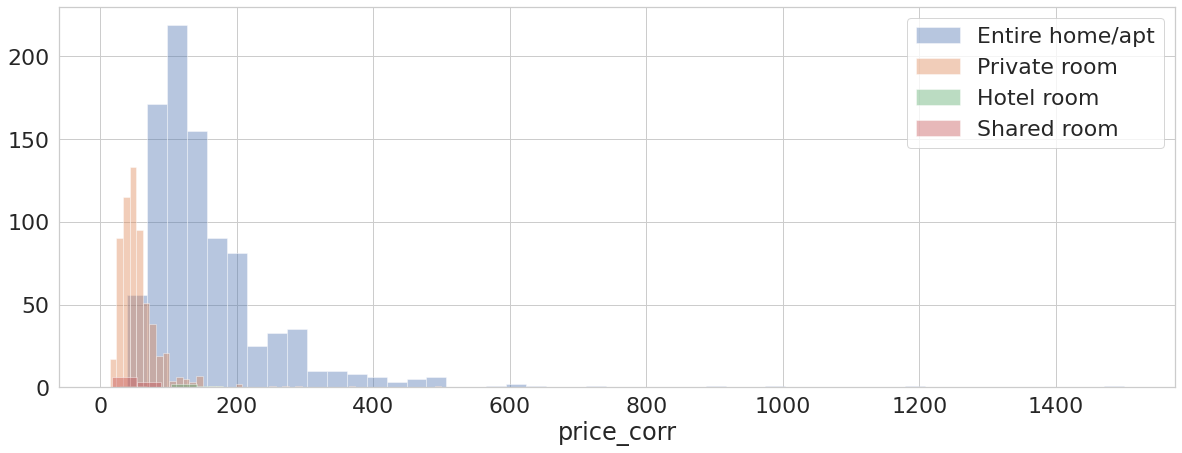

In [42]:
# sns.distplot(df.query("type=='type_1'").column, kde=False, label='type_1')
# sns.distplot(df.query("type=='type_2'").column, kde=False, label='type_2')
sns.distplot(df5.query("room_type == 'Entire home/apt'").price_corr, kde=False, label='Entire home/apt')
sns.distplot(df5.query("room_type == 'Private room'").price_corr, kde=False, label='Private room')
sns.distplot(df5.query("room_type == 'Hotel room'").price_corr, kde=False, label='Hotel room')
sns.distplot(df5.query("room_type == 'Shared room'").price_corr, kde=False, label='Shared room')
plt.legend()
plt.show()

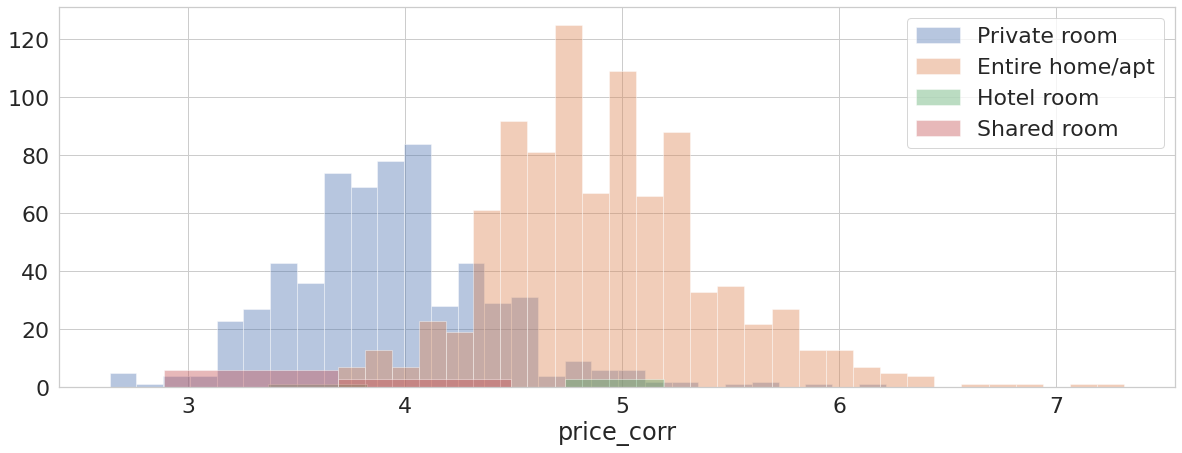

In [55]:

sns.distplot(np.log(df5.query("room_type == 'Private room'").price_corr), kde=False, label='Private room')
sns.distplot(np.log(df5.query("room_type == 'Entire home/apt'").price_corr), kde=False, label='Entire home/apt')
sns.distplot(np.log(df5.query("room_type == 'Hotel room'").price_corr), kde=False, label='Hotel room')
sns.distplot(np.log(df5.query("room_type == 'Shared room'").price_corr), kde=False, label='Shared room')
plt.legend()
plt.show()

In [57]:
#Альтернативный вариант
df5['price_log'] = np.log(df5.price_corr)
df5.head()

,room_type,price_corr,price_log
0,Private room,65.0,4.174387
1,Entire home/apt,100.0,4.605170
2,Private room,150.0,5.010635
3,Private room,45.0,3.806663
4,Private room,25.0,3.218876


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


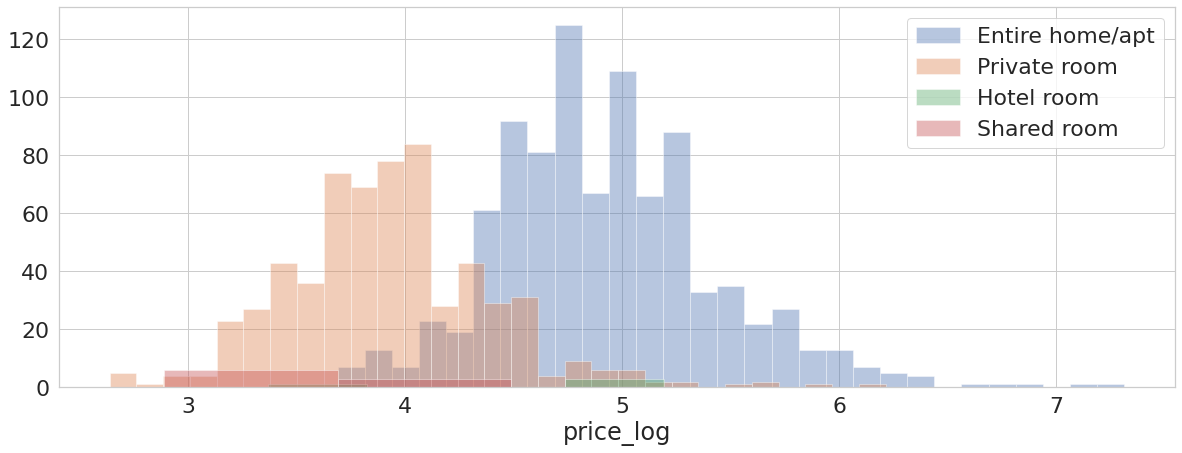

In [58]:
# от перемены мест меняется цвет. Вернее цвет всегда по порядку
sns.distplot(df5.query("room_type == 'Entire home/apt'").price_log, kde=False, label='Entire home/apt')
sns.distplot(df5.query("room_type == 'Private room'").price_log, kde=False, label='Private room')
sns.distplot(df5.query("room_type == 'Hotel room'").price_log, kde=False, label='Hotel room')
sns.distplot(df5.query("room_type == 'Shared room'").price_log, kde=False, label='Shared room')
plt.legend()
plt.show()

## 8

In [ ]:
Выгрузите данные о цене, типе жилья и дате первого отзыва, начиная со 2 января 2010 года. Необходимые столбцы:

room_type – тип сдаваемого жилья (доступные варианты: Entire home/apt, Private room, Hotel room, Shared room)
price – цена за ночь
first_review – дата первого отзыва (отфильтровать по правилу "строго больше 2010-01-01")
Ограничение поставьте на 1000 строк.

Hint: replaceRegexpAll(столбец, что_заменить, на_что_заменить) – паттерн [$,] чтобы избавиться от $ и запятых; toFloat32OrNull(столбец)

Пример результирующей таблицы:

+-----------------+------------+------------+
| room_type       | price_corr |first_review|
+-----------------+------------+------------+
| Private room    |         65 | 2010-03-23 |
| Entire home/apt |        100 | 2012-01-01 |
+-----------------+------------+------------+
Используя библиотеку seaborn и функцию lineplot, постройте график динамики средних цен на жилье (ось Y) в зависимости от типа комнаты (цвет линии, параметр 'hue') по годам (ось X). Датафрейм должен быть отсортирован по годам.

Пример датафрейма, который будет служить основой для графика:

+-----------------+------------+------------+
| room_type       | avg_price  | year       |
+-----------------+------------+------------+
| Private room    |         54 | 2010       |
| Entire home/apt |        168 | 2012       |
+-----------------+------------+------------+
Hints: line plot; удалите последние 6 символов у значений в столбце даты, чтобы получить год, например, с помощью применения lambda-функции .

 

Подсказки

Если у Вас есть вопросы, напишите сюда.

Среди представленных ниже графиков выберите корректный.



In [ ]:
- **Как решить это задание?**
    1. Выгрузить таблицу с данными о типе жилья и о цене, где дата первого отзыва строго больше `2010-01-01`. Используйте `replaceRegexpAll(столбец, что_заменить, на_что_заменить)` чтобы избавиться от $ и запятых и `toFloat32OrNull` чтобы привести колонку к нужному типу. Поставьте ограничение на **1000** строк.
    2. С помощью применения **lambda-функции** удалите последние 6 символов у значений в столбце даты, чтобы получить год.
    3. Используя `lineplot`, постройте график динамики средних цен на жилье (Y) в зависимости от типа комнаты (`hue`) по годам (X). 
- **Лямбда-функция**
    
    В этом задании необходимо удалить последние 6 символов у значений в столбце даты, чтобы получить год. Лучше использовать лямбда-функцию. Лямбда-функции - это такая компактная и анонимная функция в одну строчку, отмеченные ключевым словом `lambda`. Структура функции такая:
    
    ![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/30b762b8-50cf-49a6-9cb3-3e49e4a6c5ab/lambda.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/30b762b8-50cf-49a6-9cb3-3e49e4a6c5ab/lambda.png)
    
    `lambda` - ключевое слово
    
    `bound variable` - аргументы лямбда-функции(через запятую)
    
    `body` - выражение, тело функции, в котором мы и пишем код функции.
    
    Вдобавок к этому синтаксис лямбда-функций может быть полезен, если нам нужно адаптировать какую-то более сложную функцию для использования в функции, например `map()` или `apply()`
    
    ```python
    df.apply(lambda x: func(x))
    ```
    
    `x` - это датафрейм, на который мы применяем функцию.
    
- **lineplot()**
    
    В этом задании нужно построить график, используя `lineplot`. Пример синтаксиса
    
    ```python
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='first_column',y='second_columns',hue='type',data=df)
    ```
    
    Документация [lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

In [62]:
# создаем запрос, db автоматически заменится на значение из database
q = '''
SELECT
    room_type,
    toFloat32OrNull(replaceRegexpAll(price, '[$,]','')) AS price_corr,
    first_review
        
    FROM 
        {db}.ldn_listings 
        
    WHERE first_review > '2010-01-01'
        
    LIMIT 1000
    
    
    
    '''

# WHERE experiences_offered != 'none' Это обязательно надо --LIMIT 100
# отправляем запрос и записываем результат в пандасовский датафрейм
df6= ph.read_clickhouse(query=q, connection=connection_default)
df6

,room_type,price_corr,first_review
0,Private room,65.0,2010-08-18
1,Entire home/apt,300.0,2011-03-21
2,Entire home/apt,65.0,2016-03-05
3,Private room,29.0,2010-04-14
4,Private room,100.0,2010-10-16
...,...,...,...
995,Private room,45.0,2012-11-07
996,Private room,51.0,2013-03-18
997,Entire home/apt,79.0,2012-09-17
998,Entire home/apt,110.0,2012-09-24


In [63]:
# Добавляем маркер года
df6['year'] = pd.to_datetime(df6.first_review).dt.year


In [72]:
df6['year2']= df6.first_review.apply(lambda x: x[:4])
df6

,room_type,price_corr,first_review,year,year2
0,Private room,29.0,2010-04-14,2010,2010
1,Private room,70.0,2010-07-21,2010,2010
2,Private room,60.0,2010-08-01,2010,2010
3,Private room,65.0,2010-08-18,2010,2010
4,Entire home/apt,80.0,2010-08-31,2010,2010
...,...,...,...,...,...
995,Private room,35.0,2019-08-13,2019,2019
996,Private room,23.0,2019-08-18,2019,2019
997,Private room,45.0,2019-09-18,2019,2019
998,Private room,39.0,2020-02-08,2020,2020


In [64]:
df6.head()

,room_type,price_corr,first_review,year
0,Private room,65.0,2010-08-18,2010
1,Entire home/apt,300.0,2011-03-21,2011
2,Entire home/apt,65.0,2016-03-05,2016
3,Private room,29.0,2010-04-14,2010
4,Private room,100.0,2010-10-16,2010


In [66]:
# Сортируем по дате
df6 = df6.sort_values('first_review').reset_index(drop=True)
df6.head()

,room_type,price_corr,first_review,year
0,Private room,29.0,2010-04-14,2010
1,Private room,70.0,2010-07-21,2010
2,Private room,60.0,2010-08-01,2010
3,Private room,65.0,2010-08-18,2010
4,Entire home/apt,80.0,2010-08-31,2010


In [68]:
# Готовим данные под визуализацию
data = df6.groupby(['room_type', 'year'], as_index=False).agg({'price_corr': 'mean'})
data

,room_type,year,price_corr
0,Entire home/apt,2010,103.500000
1,Entire home/apt,2011,128.792450
2,Entire home/apt,2012,135.467255
3,Entire home/apt,2013,137.887634
4,Entire home/apt,2014,154.583328
5,Entire home/apt,2015,159.380951
6,Entire home/apt,2016,99.733330
7,Entire home/apt,2017,111.666664
8,Entire home/apt,2018,125.066666
9,Entire home/apt,2019,301.666656


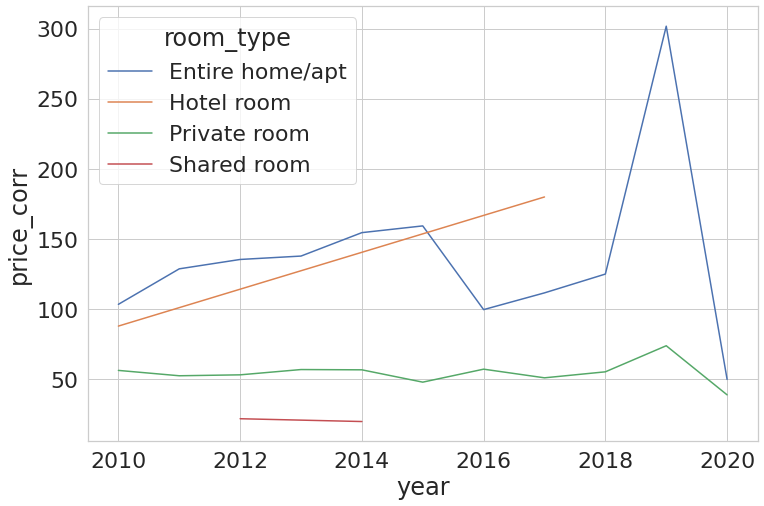

In [71]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, y='price_corr', x='year', hue='room_type')